### Introduction
**Color quantization** is a technique for reducing the number of distinct colors used in an image. By applying this technique, we will reduce the number of colors in an image from 113 382 unique colors to 64, while maintaining the overall quality of the look.

### Libraries we use

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import data
from sklearn.cluster import KMeans

### Image exploration

In [2]:
# Loading image
astronaut = data.astronaut()
# Normalisation (System RGB)
astronaut_norm = np.array(astronaut, dtype=np.float64) / 255

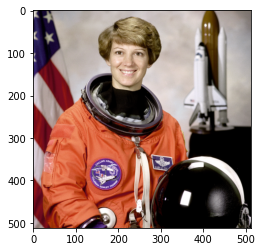

In [3]:
# Show image
# without normalisation, imshow method doesn't work
plt.imshow(astronaut_norm)

In [4]:
# Visualization of pixel values
# Reshape from 512x512x3 to 262144x3
data = astronaut_norm.reshape(-1,3)
# Conversation from array to pandas Dataframe
dataframe = pd.DataFrame(data=data[0:, 0:], columns=['R', 'G', 'B'])
# First five pixels
dataframe.head()

,R,G,B
0,0.603922,0.576471,0.592157
1,0.427451,0.403922,0.486275
2,0.247059,0.227451,0.400000
3,0.211765,0.200000,0.384314
4,0.298039,0.298039,0.415686


In [5]:
# Nombre of colors in image
dataframe.drop_duplicates().shape

(113382, 3)

In [6]:
n_colors = 64
# Model creation
# random_state to obtain the same results on each compilation
kmeans = KMeans(n_clusters = n_colors, random_state = 0)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=64, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

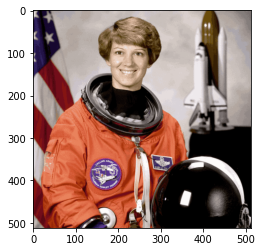

In [7]:
# Image compression
img64 = kmeans.cluster_centers_[kmeans.labels_]
# To show image reshape it to 64x64x3
img64 = img64.reshape(astronaut_norm.shape)
plt.imshow(img64)

In [8]:
# visualization of pixels values in RGB system
data64 = img64.reshape(-1,3)
dataframe64 = pd.DataFrame(data=data64[0:, 0:], columns=['R', 'G', 'B'])
dataframe64.head() # First five pixels

,R,G,B
0,0.619865,0.580247,0.566731
1,0.473337,0.441250,0.435466
2,0.295615,0.213672,0.399968
3,0.189905,0.136261,0.370217
4,0.295615,0.213672,0.399968


In [9]:
# Number of colors in the compressed image
dataframe64.drop_duplicates().shape

(64, 3)

In [10]:
# Now, image of 16 colors!
kmeans_ = KMeans(n_clusters = 16, random_state = 0).fit(data)
img16 = kmeans_.cluster_centers_[kmeans_.labels_]
img16 = img16.reshape(astronaut_norm.shape)

### Conclusion

(-0.5, 511.5, 511.5, -0.5)

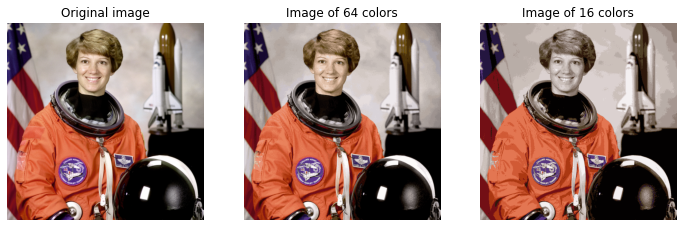

In [11]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(astronaut_norm)
ax1.set_title('Original image')
ax1.axis('off')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img64)
ax2.set_title('Image of 64 colors')
ax2.axis('off')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img16)
ax3.set_title('Image of 16 colors')
ax3.axis('off')